In [1]:
import pandas as pd

In [2]:
data_dir = '../data/'

## Data Sources Analysis

### DrugBank

num node types = 6 (+1 salt cas number)

In [3]:
drugs_df = pd.read_csv(data_dir + 'drugbank/drug_id_name_map.csv', index_col=[0])
drug_salts_df = pd.read_csv(data_dir + 'triplets/drug_salts.tsv', sep='\t', index_col=[0])
drug_salts_cas_num_df = pd.read_csv(data_dir + 'triplets/salts_cas_numebr.tsv', sep='\t', index_col=[0])
drug_subclass_df = pd.read_csv(data_dir + 'triplets/drug_subclass.tsv', sep='\t', index_col=[0])
pathway_df = pd.read_csv(data_dir + 'drugbank/pathways.csv', index_col=[0])
pathway_enzyme_df = pd.read_csv(data_dir + 'drugbank/pathways_enzym.csv', index_col=[0])
drug_category_df = pd.read_csv(data_dir + 'drugbank/drug_category.csv', index_col=[0])

num_drugs = drugs_df.shape[0]
print(f'Number of drugs in DrugBank: {num_drugs}')

num_salts = len(drug_salts_df.salt_id.unique())
print(f'Number of salts in DrugBank: {num_salts}')

num_subclasses = len(drug_subclass_df.subclass.unique())
print(f'Number of subclasses in DrugBank: {num_subclasses}')

num_categories = len(drug_category_df.category.unique())
print(f'Number of categories in DrugBank: {num_categories}')

num_pathways = len(pathway_df.smpdb_id.unique())
print(f'Number of pathways in DrugBank: {num_pathways}')

num_pathways_cat = len(pathway_df.category.unique())
print(f'Number of pathways categories in DrugBank: {num_pathways_cat}')

num_enzymes = len(pathway_enzyme_df.enzyme_id.unique())
print(f'Number of enzymes in DrugBank: {num_enzymes}')

Number of drugs in DrugBank: 4225
Number of salts in DrugBank: 1849
Number of subclasses in DrugBank: 324
Number of categories in DrugBank: 4205
Number of pathways in DrugBank: 758
Number of pathways categories in DrugBank: 6
Number of enzymes in DrugBank: 1030


In [4]:
ddi_df = pd.read_csv(data_dir + '/triplets/ddi.tsv', sep='\t', index_col=[0])
dfi_df = pd.read_csv(data_dir + '/triplets/dfi_processed.tsv', sep='\t', index_col=[0])
herbs_df = pd.read_csv(data_dir + '/triplets/herbs-di.tsv', sep='\t', index_col=[0])

print(f'Number of DDI in DrugBank: {ddi_df.shape[0]}')
print(f'Number of DFI in DrugBank: {dfi_df.shape[0]}')
print(f'Number of herb-drug interactions in mskcc: {herbs_df.shape[0]}')

print()
print(f'Number of types of interactions in DrugBank: {len(ddi_df.interaction.unique())}')

Number of DDI in DrugBank: 1681172
Number of DFI in DrugBank: 1918
Number of herb-drug interactions in mskcc: 386

Number of types of interactions in DrugBank: 202


In [52]:
# TODO: plot - types of interactions
# TODO: ddi_df.groupby(by='drug1').count()

### FooDB

Num node types = 2

In [5]:
food_df = pd.read_csv(data_dir + 'fooDB/food.csv', index_col=[0])
food_compounds_df = pd.read_csv(data_dir + 'fooDB/compound.csv', index_col=[0])
food_content_df = pd.read_csv(data_dir + 'fooDB/content.csv', index_col=[0])

print(f'Number of foods in FooDB: {food_df.shape[0]}')
print(f'Number of food compound in FooDB: {food_compounds_df.shape[0]}')

Number of foods in FooDB: 992
Number of food compound in FooDB: 70477


In [6]:
# Number of compounds in each food

tmp = food_content_df[["food_id", "id"]].groupby(by=['food_id']).count().sort_values('id', ascending=False)
food_id2name = dict(zip(food_df.id, food_df.name))
food_ids = tmp.index
food_ids = [food_id2name.get(i, i) for i in food_ids]
food_compounds_count = tmp.id

food_compounds_counts_dict = dict(zip(food_ids, food_compounds_count))
food_compounds_counts_dict

{'Cattle (Beef, Veal)': 50385,
 'Domestic pig': 24768,
 'Breakfast cereal': 13784,
 'Baby food': 13578,
 'Soup': 11102,
 'Cheese': 8792,
 'Sausage': 6793,
 'Pastry': 5426,
 'Common bean': 5220,
 'Biscuit': 5008,
 'Corn': 4893,
 'Potato': 4821,
 'Pizza': 3752,
 'Salad dressing': 2930,
 'Cake': 2813,
 'Sauce': 2806,
 'Pasta': 2760,
 'Hamburger': 2735,
 'Snack bar': 2646,
 'Cucurbita': 2582,
 'Other candy': 2574,
 'Soy bean': 2409,
 'Other snack food': 2381,
 'Cracker': 2313,
 'Eggs': 2303,
 'Pepper': 2290,
 'Wheat bread': 2172,
 'Pudding': 2164,
 'Yogurt': 2108,
 'Vegetarian food': 2041,
 'Other dish': 1958,
 'Rice': 1949,
 'Ice cream': 1900,
 'Wheat': 1839,
 'Breakfast sandwich': 1814,
 'Milk (Cow)': 1765,
 'Apple': 1694,
 'Common pea': 1689,
 'Peanut': 1645,
 'Garden tomato': 1613,
 'Pie': 1603,
 'Other bread': 1572,
 'Other sandwich': 1358,
 'Carrot': 1297,
 'Cream': 1296,
 'White bread': 1241,
 'Allium': 1167,
 'Rye bread': 1134,
 'Apricot': 1132,
 'Peach': 1129,
 'Other beverage': 1

### MSKCC - Herbs

In [7]:
herbs_df = pd.read_csv(data_dir + 'triplets/herbs-di.tsv', sep='\t', index_col=[0])
print(f'Number of herbs from mskcc: {len(herbs_df.drug2.unique())}')

Number of herbs from mskcc: 146


In [8]:
herbs_df.drug2.unique()

array(['5-HTP', 'Agaricus', 'AHCC', 'Aloe Vera', 'Andrographis',
       'ArginMax', 'Arnica', 'Artemisia annua', 'Ashwagandha',
       'Astragalus', 'Ayurveda', 'Berberine', 'Beta-Carotene',
       'Bilberry Fruit', 'Bitter Melon', 'Black Cohosh', 'Bladder wrack',
       'Blue-green Algae', 'Borage', 'Boswellia', 'Bromelain', 'Calcium',
       'Cannabis', 'Capsaicin', 'Carnitine', "Cat's Claw", 'Cayenne',
       'Chaga Mushroom', 'Chamomile', 'Chasteberry', 'Dandelion',
       "Devil's Claw", 'Di Bella Multitherapy', 'Diindolylmethane',
       'Dong Quai', 'Echinacea', 'Elderberry', 'Ellagic acid',
       'Emblica officinalis', 'Ephedra', 'Epimedium', 'Essiac',
       'Evening Primrose Oil', 'Fenugreek', 'Feverfew', 'Folate',
       'Forskolin', 'Fucoidan', 'Garcinia gummi-gutta', 'Garlic', 'GCP',
       'Ginger', 'Ginkgo', 'Ginseng (American)', 'Ginseng (Asian)',
       'Glucosamine', 'Glutamine', 'Goldenseal', 'Gotu Kola',
       'Grape Seed', 'Green Tea', 'Guarana', 'Hawthorn', 'HMB

### BioKG - OGB

num node types = 5

The ogbl-biokg dataset is a Knowledge Graph (KG), which we created using data from a large number of biomedical data repositories. It contains 5 types of entities: diseases (10,687 nodes), proteins (17,499), drugs (10,533 nodes), side effects (9,969 nodes), and protein functions (45,085 nodes). There are 51 types of directed relations connecting two types of entities, including 38 kinds of drug-drug interactions, 8 kinds of protein-protein interaction, as well as drug-protein, drug-side effect, function-function relations.

In [9]:
# subgraph

biokg_df = pd.read_csv(data_dir + 'triplets/biokg_subgraph.tsv', sep='\t', index_col=[0])
print(f'Number of all triplets: {biokg_df.shape[0]}')

drugs = set(biokg_df.drug1[biokg_df.drug1.str.match('DB.*')]).union(set(biokg_df.drug2[biokg_df.drug2.str.match('DB.*')]))
print(f'Number of drugs in BioKG subgraph: {len(drugs)}')

diseases = set(biokg_df.drug1[biokg_df.drug1.str.match('disease.*')]).union(set(biokg_df.drug2[biokg_df.drug2.str.match('disease.*')]))
print(f'Number of disease in BioKG subgraph: {len(diseases)}')

proteins = set(biokg_df.drug1[biokg_df.drug1.str.match('protein.*')]).union(set(biokg_df.drug2[biokg_df.drug2.str.match('protein.*')]))
print(f'Number of proteins in BioKG subgraph: {len(proteins)}')

side_effects = set(biokg_df.drug1[biokg_df.drug1.str.match('side.*')]).union(set(biokg_df.drug2[biokg_df.drug2.str.match('side.*')]))
print(f'Number of side effects in BioKG subgraph: {len(side_effects)}')

functions = set(biokg_df.drug1[biokg_df.drug1.str.match('function.*')]).union(set(biokg_df.drug2[biokg_df.drug2.str.match('function.*')]))
print(f'Number of functions in BioKG subgraph: {len(functions)}')

Number of all triplets: 1263637
Number of drugs in BioKG subgraph: 879
Number of disease in BioKG subgraph: 4193
Number of proteins in BioKG subgraph: 14282
Number of side effects in BioKG subgraph: 8777
Number of functions in BioKG subgraph: 13434


In [10]:
print(f'Number of relation types: {len(biokg_df.relation.unique())}')
tmp_df = biokg_df.groupby(by='relation').count().sort_values('drug1', ascending=False)
print("Number of occurences of each relation type:")
dict(zip(tmp_df.index, tmp_df.drug1))

Number of relation types: 50
Number of occurences of each relation type:


{'protein-function': 298590,
 'protein-protein_reaction': 145498,
 'protein-protein_catalysis': 130541,
 'protein-protein_binding': 126427,
 'drug-sideeffect': 82966,
 'drug-protein': 78499,
 'disease-protein': 36915,
 'protein-protein_activation': 31101,
 'drug-drug_cardiovascular_system_disease': 25424,
 'drug-drug_gastrointestinal_system_disease': 22588,
 'drug-drug_nervous_system_disease': 22120,
 'drug-drug_respiratory_system_disease': 21798,
 'drug-drug_hematopoietic_system_disease': 20472,
 'drug-drug_integumentary_system_disease': 19928,
 'drug-drug_urinary_system_disease': 18072,
 'drug-drug_acquired_metabolic_disease': 17932,
 'drug-drug_musculoskeletal_system_disease': 16886,
 'drug-drug_endocrine_system_disease': 15902,
 'drug-drug_cancer': 13678,
 'protein-protein_inhibition': 12149,
 'drug-drug_cognitive_disorder': 10910,
 'drug-drug_viral_infectious_disease': 10644,
 'drug-drug_inherited_metabolic_disorder': 10550,
 'drug-drug_immune_system_disease': 9696,
 'drug-drug_fu

### Hetionet

node types description - https://github.com/hetio/hetionet/blob/main/describe/nodes/metanodes.tsv

relations description - https://github.com/hetio/hetionet/blob/main/describe/edges/metaedges.tsv

In [11]:
hetionet_df = pd.read_csv(data_dir + 'triplets/hetionet.tsv', sep='\t', index_col=[0])
print(f'Number of all triplets: {hetionet_df.shape[0]}')

node_types = ["DB", "Gene", "Anatomy", "Biological Process", "Cellular Component", 
              "Disease", "Pathway", "Pharmacologic Class", "Side Effect", "Symptom"]

for node in node_types:
    count = len(set(hetionet_df['head'][hetionet_df['head'].str.match(node + '.*')]).union(set(hetionet_df['tail'][hetionet_df['tail'].str.match(node + '.*')])))
    print(f'Number of {node} in Hetionet subgraph: {count}')

Number of all triplets: 1221982
Number of DB in Hetionet subgraph: 1534
Number of Gene in Hetionet subgraph: 16945
Number of Anatomy in Hetionet subgraph: 389
Number of Biological Process in Hetionet subgraph: 10310
Number of Cellular Component in Hetionet subgraph: 1241
Number of Disease in Hetionet subgraph: 135
Number of Pathway in Hetionet subgraph: 1775
Number of Pharmacologic Class in Hetionet subgraph: 263
Number of Side Effect in Hetionet subgraph: 5311
Number of Symptom in Hetionet subgraph: 407


In [12]:
print(f'Number of relation types: {len(hetionet_df.relation.unique())}')
tmp_df = hetionet_df.groupby(by='relation').count().sort_values('head', ascending=False)
print("Number of occurences of each relation type:")
dict(zip(tmp_df.index, tmp_df['head']))

Number of relation types: 24
Number of occurences of each relation type:


{'Gr>G': 259502,
 'GpBP': 232224,
 'AeG': 201805,
 'CcSE': 138489,
 'GiG': 100384,
 'GpPW': 39931,
 'GpMF': 38385,
 'AuG': 33126,
 'AdG': 32964,
 'GpCC': 28460,
 'GcG': 26489,
 'CdG': 20874,
 'CuG': 18435,
 'DaG': 11681,
 'CbG': 11163,
 'DuG': 7115,
 'DdG': 7047,
 'CrC': 6287,
 'DlA': 2595,
 'DpS': 2504,
 'PCiC': 931,
 'CtD': 748,
 'DrD': 454,
 'CpD': 389}

## Datasets Analysis

In [34]:
from collections import Counter
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', va='bottom', fontsize='medium')
        
def plot_relation_distribution(df, dataset):
    counts = Counter(list(df.relation))
    print(counts)
    
    fig = plt.figure(figsize = (20, 6))
    plt.bar(x=counts.keys(), height=counts.values())
    plt.yscale('log')
    addlabels(list(counts.keys()), list(counts.values()))
    plt.xticks(rotation=70)
    plt.xlabel('Relation type')
    plt.ylabel('Number of occurences (log scale)')
    plt.title(f'Distribution of {dataset} relations')
    plt.show()

In [30]:
import networkx as nx
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

def plot_distribution(l, dataset):
    plt.figure(figsize=(10, 6))
    plt.hist(l, bins=500)
    plt.xlabel("node degree")
    plt.ylabel("count")
    plt.yscale('log')
    plt.title(f'Distribution of Node Degrees in {dataset}')
    plt.show()

def node_degree_info(df, dataset):
    nodes = df[['head', 'tail']].stack().unique()
    print('Number of unique nodes:', len(nodes))
    nodes_map = {node: i for i, node in enumerate(nodes)}

    edges = df['relation'].unique()
    edges_map = {edge: i for i, edge in enumerate(edges)}
    print('Number of unique edges:', len(edges))

    heads = df['head'].map(nodes_map)
    tails = df['tail'].map(nodes_map)
    edges = torch.tensor([heads.values, tails.values])


    data = Data(edge_index=edges, num_nodes=len(nodes))

    G = to_networkx(data, to_undirected=False)
    degrees = G.degree()
    degrees_val = [val for (node, val) in degrees]
    
    nodes_with_highest_degree = sorted(degrees, key=lambda tup: tup[1], reverse=True)[:10]
    reverse_node_map = dict((v,k) for k,v in nodes_map.items())
    nodes_with_highest_degree = [(reverse_node_map[node], val) for (node, val) in nodes_with_highest_degree]
    print()
    print('Nodes with the higest node degree:')
    print(nodes_with_highest_degree)
    print()

    print(f'Node degrees of {dataset}:')
    display(pd.DataFrame(pd.Series(degrees_val).describe()).transpose().round(2))
    
    plot_distribution(degrees_val, dataset)
    

### Drugbank (full)

number of node types - same as in drugbank (= 6)


In [24]:
drugbank_df_train = pd.read_csv(data_dir + 'triplets/train_drugbank.tsv', sep='\t') 
drugbank_df_valid = pd.read_csv(data_dir + 'triplets/valid_drugbank.tsv', sep='\t') 
drugbank_df_test = pd.read_csv(data_dir + 'triplets/test_drugbank.tsv', sep='\t') 

drugbank_df = pd.concat([drugbank_df_train, drugbank_df_valid, drugbank_df_test])
drugbank_df

,head,relation,tail
0,DB01424,interacts,DB00384
1,DB00292,interacts,DB00282
2,DB01428,interacts,DB00872
3,DB12474,interacts,DB00054
4,DB11641,interacts,DB01016
...,...,...,...
68531,DB10651,interacts,Melatonin
68532,antiplatelet agents,interacts,Boswellia
68533,cytochrome p-450,interacts,Ashwagandha
68534,DB08816,interacts,Green Tea


Counter({'interacts': 685904, 'in_category': 91839, 'involved_in_pathway': 15934, 'contains': 12866, 'in_subclass': 2264, 'is_category': 1957, 'has_cas_number': 1892})


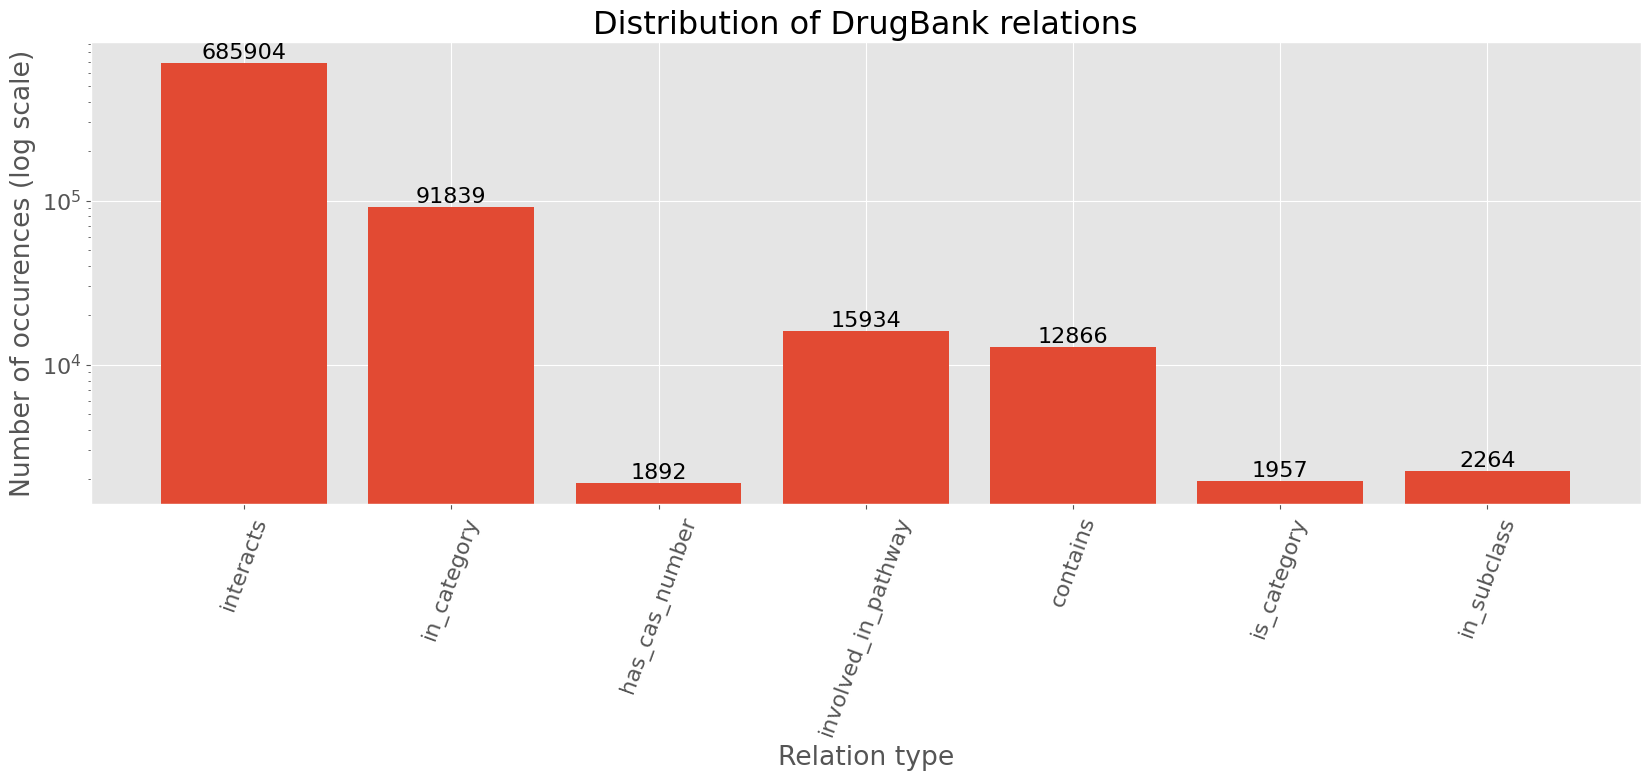

In [35]:
plot_relation_distribution(drugbank_df, 'DrugBank')

Number of unique nodes: 19934
Number of unique edges: 7


/tmp/ipykernel_1035/3409453823.py:26: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  edges = torch.tensor([heads.values, tails.values])



Nodes with the higest node degree:
[('DB00908', 1757), ('DB00363', 1753), ('DB00477', 1719), ('DB00458', 1701), ('DB00321', 1685), ('DB00091', 1685), ('DB00564', 1650), ('DB00502', 1643), ('DB09241', 1636), ('Heterocyclic Compounds, Fused-Ring', 1634)]

Node degrees of DrugBank:


,count,mean,std,min,25%,50%,75%,max
0,19934.0,81.36,237.77,1.0,2.0,5.0,15.0,1757.0


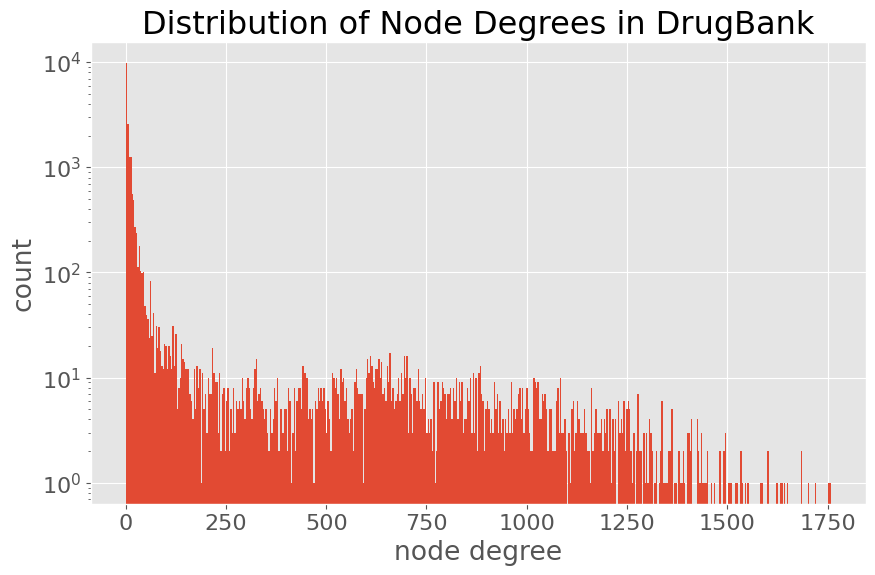

In [36]:
node_degree_info(drugbank_df, 'DrugBank')

Number of unique nodes: 2752
Number of unique edges: 1

Nodes with the higest node degree:
[('DB00363', 1684), ('DB00908', 1668), ('DB00477', 1651), ('DB00091', 1638), ('DB00458', 1624), ('DB00321', 1616), ('DB00502', 1593), ('DB09241', 1581), ('DB00564', 1580), ('DB01149', 1576)]

Node degrees of Interactions:


,count,mean,std,min,25%,50%,75%,max
0,2752.0,498.06,413.32,1.0,84.0,487.5,806.0,1684.0


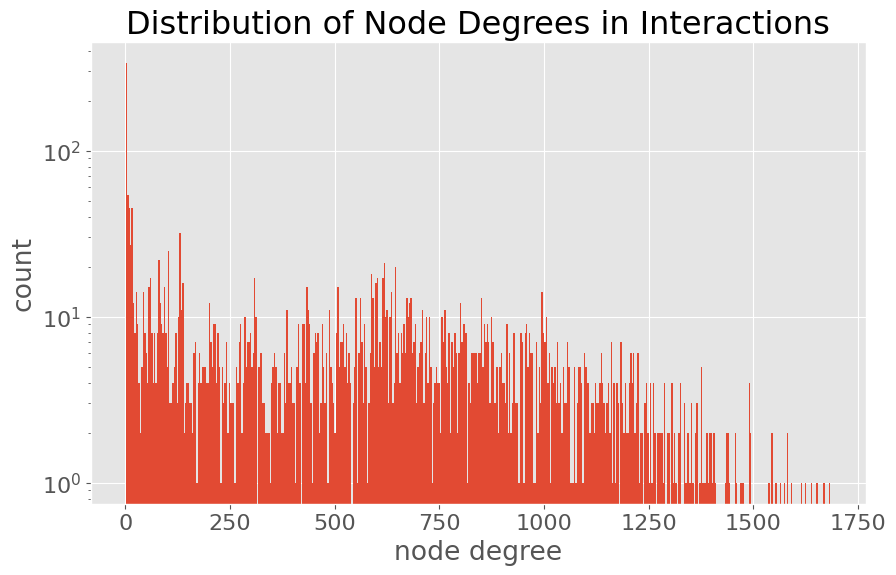

In [51]:
interactions_df = drugbank_df[drugbank_df['relation'] == 'interacts']
node_degree_info(interactions_df, 'Interactions')

### DrugBank + BioKG subgraph

In [37]:
biokg_df_train = pd.read_csv(data_dir + 'triplets/train_biokg.tsv', sep='\t') 
biokg_df_valid = pd.read_csv(data_dir + 'triplets/valid_biokg.tsv', sep='\t') 
biokg_df_test = pd.read_csv(data_dir + 'triplets/test_biokg.tsv', sep='\t') 

biokg_df = pd.concat([biokg_df_train, biokg_df_valid, biokg_df_test])
biokg_df

,head,relation,tail
0,DB01424,interacts,DB00384
1,DB00292,interacts,DB00282
2,DB01428,interacts,DB00872
3,DB12474,interacts,DB00054
4,DB11641,interacts,DB01016
...,...,...,...
68531,DB10651,interacts,Melatonin
68532,antiplatelet agents,interacts,Boswellia
68533,cytochrome p-450,interacts,Ashwagandha
68534,DB08816,interacts,Green Tea


Counter({'interacts': 685904, 'protein-function': 298590, 'protein-protein_reaction': 145498, 'protein-protein_catalysis': 130541, 'protein-protein_binding': 126427, 'in_category': 91839, 'drug-sideeffect': 82966, 'drug-protein': 78499, 'disease-protein': 36915, 'protein-protein_activation': 31101, 'drug-drug_cardiovascular_system_disease': 25424, 'drug-drug_gastrointestinal_system_disease': 22588, 'drug-drug_nervous_system_disease': 22120, 'drug-drug_respiratory_system_disease': 21798, 'drug-drug_hematopoietic_system_disease': 20472, 'drug-drug_integumentary_system_disease': 19928, 'drug-drug_urinary_system_disease': 18072, 'drug-drug_acquired_metabolic_disease': 17932, 'drug-drug_musculoskeletal_system_disease': 16886, 'involved_in_pathway': 15934, 'drug-drug_endocrine_system_disease': 15902, 'drug-drug_cancer': 13678, 'contains': 12866, 'protein-protein_inhibition': 12149, 'drug-drug_cognitive_disorder': 10910, 'drug-drug_viral_infectious_disease': 10644, 'drug-drug_inherited_metabo

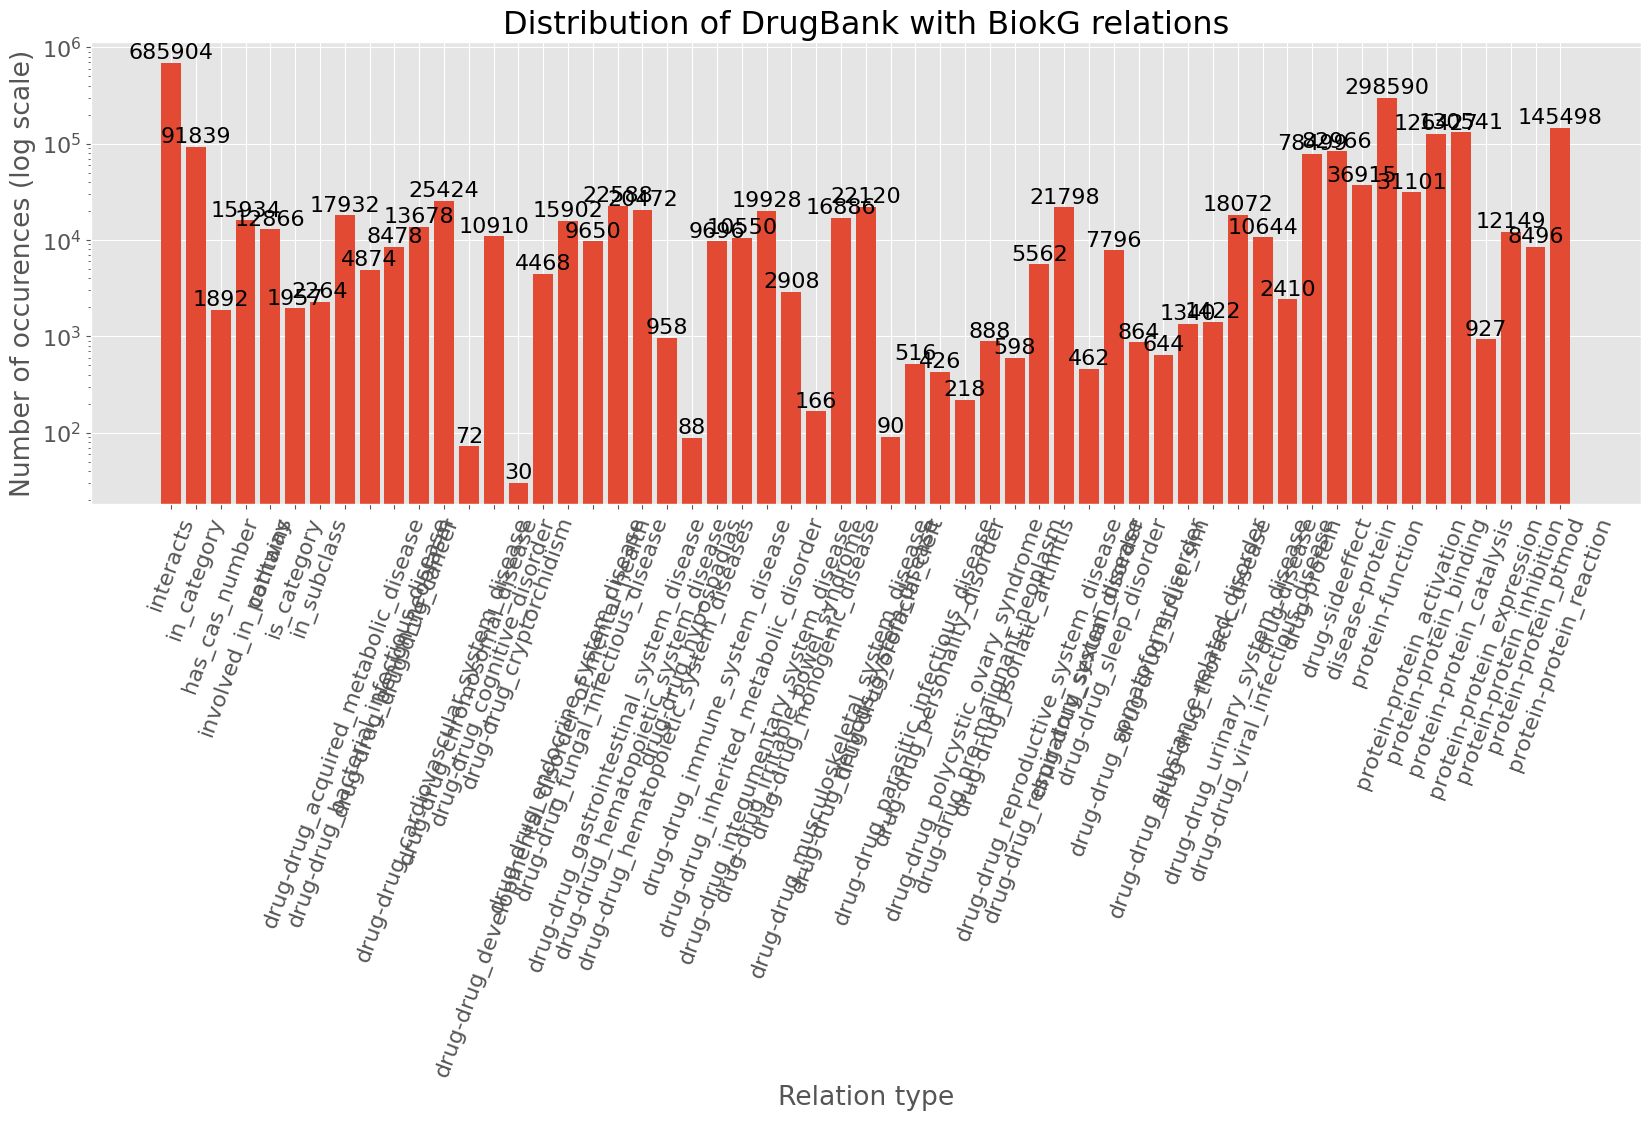

In [38]:
plot_relation_distribution(biokg_df, 'DrugBank with BiokG')

Number of unique nodes: 61202
Number of unique edges: 57

Nodes with the higest node degree:
[('DB09462', 3731), ('drug_9739', 3450), ('function_4196', 3398), ('function_6146', 3245), ('function_22797', 3231), ('function_22758', 2855), ('DB00363', 2837), ('function_2789', 2837), ('DB01593', 2685), ('DB00533', 2678)]

Node degrees of DrugBank with BiokG:


,count,mean,std,min,25%,50%,75%,max
0,61202.0,51.75,179.97,1.0,2.0,5.0,18.0,3731.0


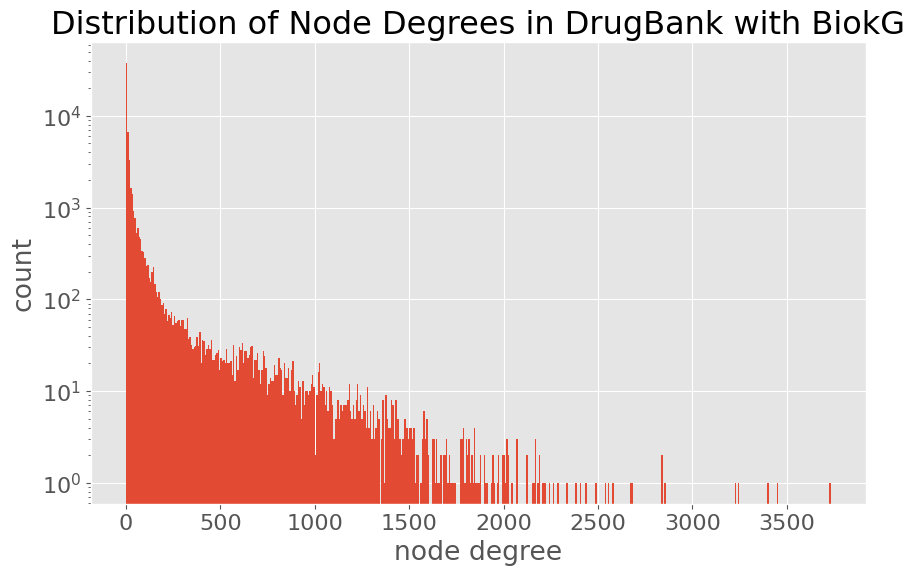

In [39]:
node_degree_info(biokg_df, 'DrugBank with BiokG')

### DrugBank + Hetionet subgraph

In [42]:
hetionet_df_train = pd.read_csv(data_dir + 'triplets/train_hetionet.tsv', sep='\t') 
hetionet_df_valid = pd.read_csv(data_dir + 'triplets/valid_hetionet.tsv', sep='\t') 
hetionet_df_test = pd.read_csv(data_dir + 'triplets/test_hetionet.tsv', sep='\t') 

hetionet_df = pd.concat([hetionet_df_train, hetionet_df_valid, hetionet_df_test])
hetionet_df

,head,relation,tail
0,DB01424,interacts,DB00384
1,DB00292,interacts,DB00282
2,DB01428,interacts,DB00872
3,DB12474,interacts,DB00054
4,DB11641,interacts,DB01016
...,...,...,...
68531,DB10651,interacts,Melatonin
68532,antiplatelet agents,interacts,Boswellia
68533,cytochrome p-450,interacts,Ashwagandha
68534,DB08816,interacts,Green Tea


Counter({'interacts': 685904, 'Gr>G': 259502, 'GpBP': 232224, 'AeG': 201805, 'CcSE': 138489, 'GiG': 100384, 'in_category': 91839, 'GpPW': 39931, 'GpMF': 38385, 'AuG': 33126, 'AdG': 32964, 'GpCC': 28460, 'GcG': 26489, 'CdG': 20874, 'CuG': 18435, 'involved_in_pathway': 15934, 'contains': 12866, 'DaG': 11681, 'CbG': 11163, 'DuG': 7115, 'DdG': 7047, 'CrC': 6287, 'DlA': 2595, 'DpS': 2504, 'in_subclass': 2264, 'is_category': 1957, 'has_cas_number': 1892, 'PCiC': 931, 'CtD': 748, 'DrD': 454, 'CpD': 389})


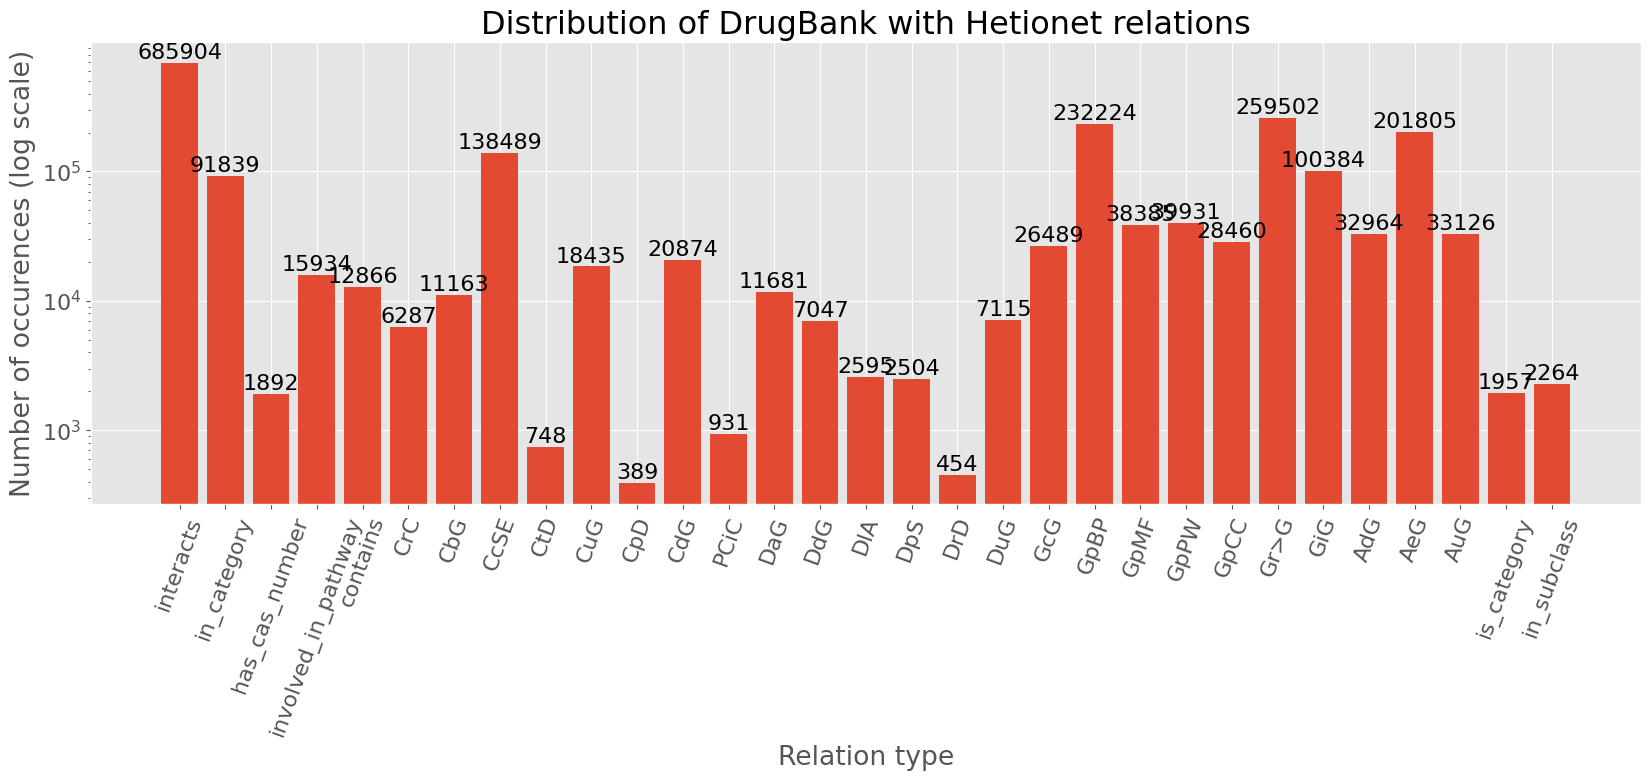

In [43]:
plot_relation_distribution(hetionet_df, 'DrugBank with Hetionet')

Number of unique nodes: 59239
Number of unique edges: 31

Nodes with the higest node degree:
[('Anatomy::UBERON:0000955', 4852), ('Anatomy::UBERON:0000473', 4685), ('Anatomy::UBERON:0002048', 4563), ('Anatomy::UBERON:0002369', 4511), ('Anatomy::UBERON:0002107', 4505), ('Anatomy::UBERON:0000948', 4484), ('Anatomy::UBERON:0000029', 4361), ('Anatomy::UBERON:0002367', 4347), ('Anatomy::UBERON:0002037', 4323), ('Anatomy::UBERON:0002046', 4311)]

Node degrees of DrugBank with Hetionet:


,count,mean,std,min,25%,50%,75%,max
0,59239.0,66.78,214.99,1.0,2.0,6.0,27.0,4852.0


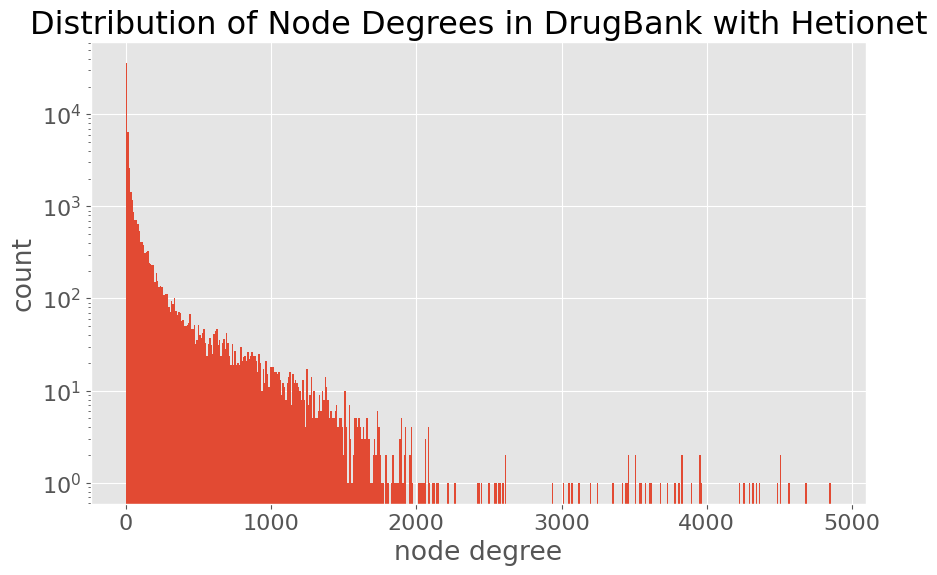

In [44]:
node_degree_info(hetionet_df, 'DrugBank with Hetionet')

## Detailed Analysis of One Drug

## Other

### Common drugs in DrugBank
common drugs - from the list

In Common_drugs_stats notebook

### Food compounds in drugs
Drug salts cas-number vs food comounds cas-number

In [52]:
food_compounds_cas = food_compounds_df.dropna(subset=['cas_number'])
common_compounds = food_compounds_df.merge(drug_salts_cas_num_df, on='cas_number')[['public_id', 'name', 'cas_number', 'salt_id']]

print('Number of common compounds (in food and drugs):', common_compounds.shape[0])
common_compounds

Number of common compounds (in food and drugs): 72


,public_id,name,cas_number,salt_id
0,FDB000133,6-Geranylnaringenin,475207-59-1,DBSALT000165
1,FDB013082,Rubrofusarin 6-[glucosyl-(1->3)-glucosyl-(1->6...,475207-59-1,DBSALT000165
2,FDB013083,Norrubrofusarin 6-gentiobioside,475207-59-1,DBSALT000165
3,FDB015004,Shyobunyl acetate,475207-59-1,DBSALT000165
4,FDB000447,Papaverine,61-25-6,DBSALT000412
...,...,...,...,...
67,FDB022747,Ranitidine,66357-59-3,DBSALT000487
68,FDB022751,Doxylamine,562-10-7,DBSALT001402
69,FDB022753,Lisinopril,83915-83-7,DBSALT002494
70,FDB022759,Chlorpheniramine,113-92-8,DBSALT000987
